# Assignment 3 - Yuan Liu

In [2]:
import scipy.io as sio 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt #for ploting
import math #logarithmic  computation
import powerlaw 
matFile = sio.loadmat("Homo_sapiens.mat") # read mat file

In [195]:
matFile # take a look at file

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Nov 12 18:54:12 2015',
 '__version__': '1.0',
 '__globals__': [],
 'group': <3890x50 sparse matrix of type '<class 'numpy.float64'>'
 	with 6640 stored elements in Compressed Sparse Column format>,
 'network': <3890x3890 sparse matrix of type '<class 'numpy.float64'>'
 	with 76584 stored elements in Compressed Sparse Column format>}

In [3]:
G = nx.from_numpy_matrix(matFile["network"].todense()) # convert sprase to dense

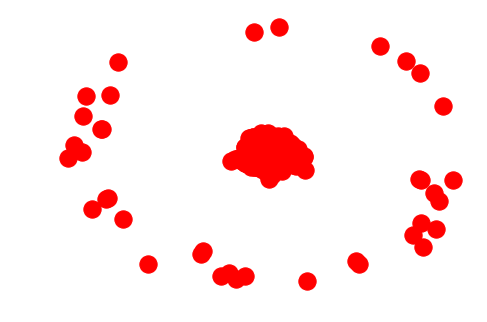

In [197]:
nx.draw(G)
plt.show()

## Plot the network

In [68]:
nx.is_connected(G)

False

## The network is not connected

In [53]:
numConCompo=nx.number_connected_components(G)
numConCompo

35

## In a total of 35 connected components in this network

In [4]:
degreeCentrality = nx.degree_centrality(G)
eigenCentrality = nx.eigenvector_centrality(G)
closenessCentrality = nx.closeness_centrality(G)
harmonicCentrality = nx.harmonic_centrality(G)
betweenCentrality = nx.betweenness_centrality(G)
pageRank = nx.pagerank(G)
clusteringCoefficient = nx.clustering(G)

## compute the necessary statistics to delineate this network centrality 

In [14]:
with open("centrality.csv","w") as wf:
    wf.write(",".join(["node","degree centrality","eigenvector centrality","closeness centrality","harmonic centrality","betweeness centrality", "page rank","clustering coefficient"]))
    wf.write("\n")
    for i in range(0,len(degreeCentrality)):
        wf.write(",".join([str(i),str(degreeCentrality[i]),str(eigenCentrality[i]),str(closenessCentrality[i]),str(harmonicCentrality[i]),str(betweenCentrality[i]),str(pageRank[i]),str(clusteringCoefficient[i])]))
        wf.write("\n")

## Output centrality of nodes to a file

Text(0.5,1,'clustering cofficient')

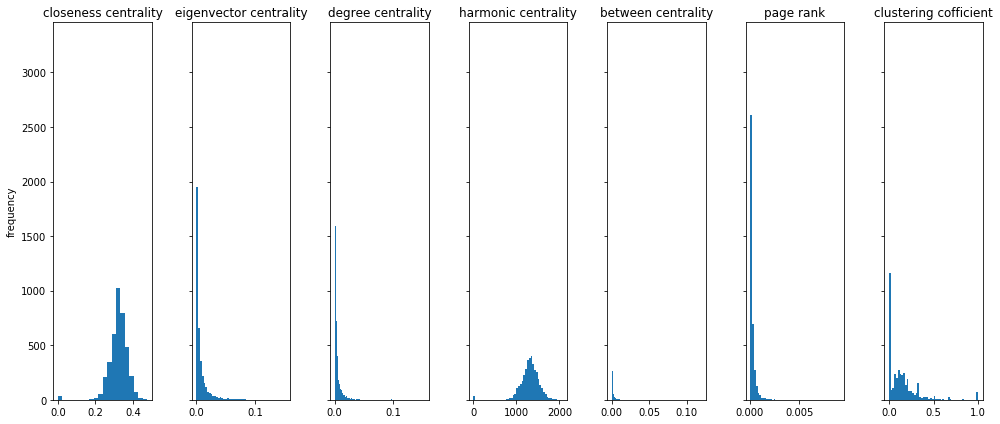

In [188]:
#Test line
_ , axs = plt.subplots(1, 7, sharey=True, tight_layout=True,figsize=(14,6))
_ , _ , _ = axs[0].hist(closenessCentrality.values(),20)
_ , _ , _ = axs[1].hist(eigenCentrality.values(),50)
_ , _ , _ = axs[2].hist(degreeCentrality.values(),100)
_ , _ , _ = axs[3].hist(harmonicCentrality.values(),50)
_ , _ , _ = axs[4].hist(betweenCentrality.values(),200)
_ , _ , _ = axs[5].hist(pageRank.values(),50)
_ , _ , _ = axs[6].hist(clusteringCoefficient.values(),50)
axs[0].set_ylabel("frequency")
axs[0].set_title("closeness centrality")
axs[1].set_title("eigenvector centrality")
axs[2].set_title("degree centrality")
axs[3].set_title("harmonic centrality")
axs[4].set_title("between centrality")
axs[5].set_title("page rank")
axs[6].set_title("clustering cofficient")

## closeness and harmonic centralities distribute a bell shape
## eigenvector, degree, between centrality, page rank, and clustering cofficient are more likely to follow power law.

In [7]:
degreeCentrality = nx.degree_centrality(G)
degreeCentralityValue = list(degreeCentrality.values())

In [9]:
results=powerlaw.Fit(degreeCentralityValue)

Calculating best minimal value for power law fit


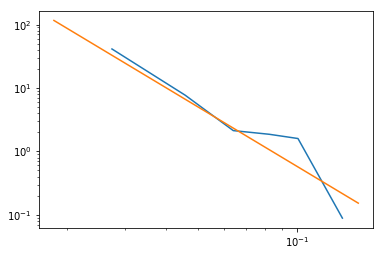

In [16]:
results.plot_pdf()
results.power_law.plot_pdf()

## A straight line trend can be observed. Even though it is not a perfect straight line, it is still a good fit.

In [191]:
results.distribution_compare("power_law","lognormal")

(-0.34965162343024914, 0.5578641371787154)

In [192]:
results.distribution_compare('power_law', 'lognormal_positive')

(146296.49517878177, 0.0)

## Two comparisons were conducted to investigate other possible distributions followed by degree centrality. The power_law distribution fits better over lognormal_positive distribution. Comparasion between power_law and lognormal distribution is not significant